# Aggregation 📚

### After this session you should be able to 
- apply different aggregation methods to your datasets
- explain in your own words what .groupby() does and apply it to your datasets
- use .groupby() in combination with different methods (including plotting)

In [16]:
import pandas as pd
import numpy as np
    

In [17]:
df = pd.read_csv('large_countries_2015.csv',sep = ',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     12 non-null     object 
 1   population  12 non-null     float64
 2   fertility   12 non-null     float64
 3   continent   12 non-null     object 
dtypes: float64(2), object(2)
memory usage: 512.0+ bytes


In [18]:
df.sum()

country       BangladeshBrazilChinaIndiaIndonesiaJapanMexico...
population                                         4504153940.0
fertility                                                 29.25
continent     AsiaSouth AmericaAsiaAsiaAsiaAsiaNorth America...
dtype: object

In [19]:
df['population'].sum()
#not suitable for categoriacal data

4504153940.0

In [20]:
df.sum(numeric_only= True)

population    4.504154e+09
fertility     2.925000e+01
dtype: float64

In [21]:
df['country'].count()
df['population'].count()

12

In [22]:
df['country'].value_counts()

Bangladesh       1
Brazil           1
China            1
India            1
Indonesia        1
Japan            1
Mexico           1
Nigeria          1
Pakistan         1
Philippines      1
Russia           1
United States    1
Name: country, dtype: int64

In [23]:
df['country'].value_counts(normalize= True)

Bangladesh       0.083333
Brazil           0.083333
China            0.083333
India            0.083333
Indonesia        0.083333
Japan            0.083333
Mexico           0.083333
Nigeria          0.083333
Pakistan         0.083333
Philippines      0.083333
Russia           0.083333
United States    0.083333
Name: country, dtype: float64

In [24]:
df.describe()

,population,fertility
count,1.200000e+01,12.000000
mean,3.753462e+08,2.437500
std,4.565194e+08,1.200781
min,1.006994e+08,1.450000
25%,1.393470e+08,1.737500
50%,1.855634e+08,2.125000
75%,2.736163e+08,2.567500
max,1.376049e+09,5.890000


In [25]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
population,12.0,3.753462e+08,4.565194e+08,1.006994e+08,1.393470e+08,1.855634e+08,2.736163e+08,1.376049e+09
fertility,12.0,2.437500e+00,1.200781e+00,1.450000e+00,1.737500e+00,2.125000e+00,2.567500e+00,5.890000e+00


In [26]:
df.agg(
    {'population':'mean',
    'fertility':'median'}
)

population    3.753462e+08
fertility     2.125000e+00
dtype: float64

In [27]:
df.agg(['mean','median','std'])

,population,fertility
mean,3.753462e+08,2.437500
median,1.855634e+08,2.125000
std,4.565194e+08,1.200781


In [28]:
def function_double(x):
    return 2*x

df.agg(
    {'population':'mean',
    'fertility':function_double,  #Cannot do it simultaneously
    }
)

ValueError: cannot perform both aggregation and transformation operations simultaneously

## 1. Applying aggregation methods: 

Let's apply some aggregation methods!
Intuition of "aggregation": take some rows, apply some kind of "operation" on them and return a resumed version of these rows.

## 2. .groupby()!

What DOES .groupby() actually do?
1. it **splits** the data
2. it **applies** some kind of operation ON THE GROUPED data
3. it **combines** the data back into a new (pandas) object (i.e. series or dataframe)

In [ ]:
g = df.groupby('continent')
print(type(g))
print(type(df))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
for continents, group in g:
    print(continents)
    print(group)
    print('\n')

Africa
   country   population  fertility continent
7  Nigeria  182201962.0       5.89    Africa


Asia
       country    population  fertility continent
0   Bangladesh  1.609956e+08       2.12      Asia
2        China  1.376049e+09       1.57      Asia
3        India  1.311051e+09       2.43      Asia
4    Indonesia  2.575638e+08       2.28      Asia
5        Japan  1.265735e+08       1.45      Asia
8     Pakistan  1.889249e+08       3.04      Asia
9  Philippines  1.006994e+08       2.98      Asia


Europe
   country   population  fertility continent
10  Russia  143456918.0       1.61    Europe


North America
          country   population  fertility      continent
6          Mexico  127017224.0       2.13  North America
11  United States  321773631.0       1.97  North America


South America
  country   population  fertility      continent
1  Brazil  207847528.0       1.78  South America




In [ ]:
for continents, group in g:
    print(continents, group)

Africa    country   population  fertility continent
7  Nigeria  182201962.0       5.89    Africa
Asia        country    population  fertility continent
0   Bangladesh  1.609956e+08       2.12      Asia
2        China  1.376049e+09       1.57      Asia
3        India  1.311051e+09       2.43      Asia
4    Indonesia  2.575638e+08       2.28      Asia
5        Japan  1.265735e+08       1.45      Asia
8     Pakistan  1.889249e+08       3.04      Asia
9  Philippines  1.006994e+08       2.98      Asia
Europe    country   population  fertility continent
10  Russia  143456918.0       1.61    Europe
North America           country   population  fertility      continent
6          Mexico  127017224.0       2.13  North America
11  United States  321773631.0       1.97  North America
South America   country   population  fertility      continent
1  Brazil  207847528.0       1.78  South America


In [ ]:
g.get_group('Asia')

,country,population,fertility,continent
0,Bangladesh,1.609956e+08,2.12,Asia
2,China,1.376049e+09,1.57,Asia
3,India,1.311051e+09,2.43,Asia
4,Indonesia,2.575638e+08,2.28,Asia
5,Japan,1.265735e+08,1.45,Asia
8,Pakistan,1.889249e+08,3.04,Asia
9,Philippines,1.006994e+08,2.98,Asia


In [ ]:
asia = g.get_group('Asia')


In [ ]:
g['population'].mean()

continent
Africa           1.822020e+08
Asia             5.031224e+08
Europe           1.434569e+08
North America    2.243954e+08
South America    2.078475e+08
Name: population, dtype: float64

In [ ]:
pop = g['population'].mean()

In [ ]:
type(pop)

pandas.core.series.Series

<AxesSubplot:xlabel='continent'>

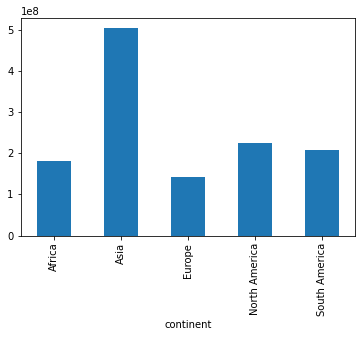

In [ ]:
g['population'].mean().plot.bar()

<AxesSubplot:ylabel='continent'>

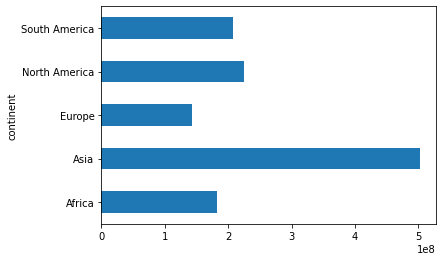

In [ ]:
g['population'].mean().plot.barh()

<AxesSubplot:ylabel='continent'>

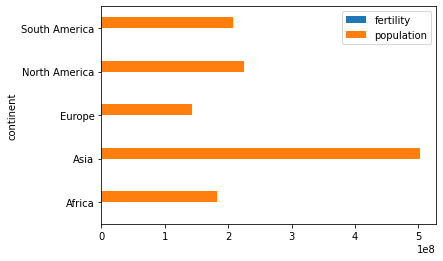

In [ ]:
g[['fertility','population']].mean().plot.barh()

In [ ]:
g2 = df.groupby(['continent','country'])

In [ ]:
for continent,group in g2:
    print(continent)
    print(group)
    print('\n')

('Africa', 'Nigeria')
   country   population  fertility continent
7  Nigeria  182201962.0       5.89    Africa


('Asia', 'Bangladesh')
      country   population  fertility continent
0  Bangladesh  160995642.0       2.12      Asia


('Asia', 'China')
  country    population  fertility continent
2   China  1.376049e+09       1.57      Asia


('Asia', 'India')
  country    population  fertility continent
3   India  1.311051e+09       2.43      Asia


('Asia', 'Indonesia')
     country   population  fertility continent
4  Indonesia  257563815.0       2.28      Asia


('Asia', 'Japan')
  country   population  fertility continent
5   Japan  126573481.0       1.45      Asia


('Asia', 'Pakistan')
    country   population  fertility continent
8  Pakistan  188924874.0       3.04      Asia


('Asia', 'Philippines')
       country   population  fertility continent
9  Philippines  100699395.0       2.98      Asia


('Europe', 'Russia')
   country   population  fertility continent
10  Russia  14

In [ ]:
print(g2['population'].mean())

continent      country      
Africa         Nigeria          1.822020e+08
Asia           Bangladesh       1.609956e+08
               China            1.376049e+09
               India            1.311051e+09
               Indonesia        2.575638e+08
               Japan            1.265735e+08
               Pakistan         1.889249e+08
               Philippines      1.006994e+08
Europe         Russia           1.434569e+08
North America  Mexico           1.270172e+08
               United States    3.217736e+08
South America  Brazil           2.078475e+08
Name: population, dtype: float64


In [ ]:
print(g2[['population']].mean())
#returns as data frame!

                               population
continent     country                    
Africa        Nigeria        1.822020e+08
Asia          Bangladesh     1.609956e+08
              China          1.376049e+09
              India          1.311051e+09
              Indonesia      2.575638e+08
              Japan          1.265735e+08
              Pakistan       1.889249e+08
              Philippines    1.006994e+08
Europe        Russia         1.434569e+08
North America Mexico         1.270172e+08
              United States  3.217736e+08
South America Brazil         2.078475e+08


In [ ]:
print(type(g2['population'].mean()))
print(type(g2[['population']].mean()))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
g.agg(
    {'population':'mean',
    'fertility':function_double
    }
)
#now it can do!

,population,fertility
continent,,
Africa,1.822020e+08,11.78
Asia,5.031224e+08,"[4.24, 3.14, 4.86, 4.56, 2.9, 6.08, 5.96]"
Europe,1.434569e+08,3.22
North America,2.243954e+08,"[4.26, 3.94]"
South America,2.078475e+08,3.56


In [ ]:
g3 = df.groupby(['continent','country'])['fertility'].mean()
g3

continent      country      
Africa         Nigeria          5.89
Asia           Bangladesh       2.12
               China            1.57
               India            2.43
               Indonesia        2.28
               Japan            1.45
               Pakistan         3.04
               Philippines      2.98
Europe         Russia           1.61
North America  Mexico           2.13
               United States    1.97
South America  Brazil           1.78
Name: fertility, dtype: float64

In [ ]:
g4 = df.groupby('country').transform(function_double)
g4

,population,fertility,continent
0,3.219913e+08,4.24,AsiaAsia
1,4.156951e+08,3.56,South AmericaSouth America
2,2.752098e+09,3.14,AsiaAsia
3,2.622101e+09,4.86,AsiaAsia
4,5.151276e+08,4.56,AsiaAsia
5,2.531470e+08,2.90,AsiaAsia
6,2.540344e+08,4.26,North AmericaNorth America
7,3.644039e+08,11.78,AfricaAfrica
8,3.778497e+08,6.08,AsiaAsia
9,2.013988e+08,5.96,AsiaAsia


In [ ]:
g5 = df.groupby('country')['population','fertility'].agg(['min','median'])
g5

/var/folders/c4/jkw5wy1d7lndc6p4y832vmrc0000gn/T/ipykernel_12377/669444610.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  g5 = df.groupby('country')['population','fertility'].agg(['min','median'])


population               fertility       
                        min        median       min median
country                                                   
Bangladesh     1.609956e+08  1.609956e+08      2.12   2.12
Brazil         2.078475e+08  2.078475e+08      1.78   1.78
China          1.376049e+09  1.376049e+09      1.57   1.57
India          1.311051e+09  1.311051e+09      2.43   2.43
Indonesia      2.575638e+08  2.575638e+08      2.28   2.28
Japan          1.265735e+08  1.265735e+08      1.45   1.45
Mexico         1.270172e+08  1.270172e+08      2.13   2.13
Nigeria        1.822020e+08  1.822020e+08      5.89   5.89
Pakistan       1.889249e+08  1.889249e+08      3.04   3.04
Philippines    1.006994e+08  1.006994e+08      2.98   2.98
Russia         1.434569e+08  1.434569e+08      1.61   1.61
United States  3.217736e+08  3.217736e+08      1.97   1.97

In [36]:
g1 = df.groupby('continent')
g1.groups

# 2. by an array of equal length
industrialized = np.array([False, True, True, True, False, True, True, False, False, False, True, True])
g2 = df.groupby(industrialized)
g2.groups

# 3. by a Dictionary with keys on the Index
language = {'Bangladesh':'BN', 'Brazil':'PT', 'China':'CN',
            'India':'BN', 'Indonesia':'MS', 'Japan':'JP',
            'Mexico':'ES', 'Nigeria':'NG', 'Pakistan':'UR',
            'Philippines':'PP', 'Russia':'RU', 'United States':'EN'}
g3 = df.groupby(language)
g3.groups

# 4. by a function
#g4 = df['country'].groupby()
#g4.groups

# 5. a list of the above
g5 = df.groupby(['continent', language]) #, len
g5.groups

# 6. group along the x-axis
#g6 = df[['population', 'fertility']].transpose().groupby(len, axis=1)
#g6.groups

{('Africa', nan): [7], ('Asia', nan): [0, 2, 3, 4, 5, 8, 9], ('Europe', nan): [10], ('North America', nan): [6, 11], ('South America', nan): [1]}